  Startup Name Industry  Funding Rounds  Funding Amount (M USD)  \
0    Startup_1      IoT               1                  101.09   
1    Startup_2   EdTech               1                  247.62   
2    Startup_3   EdTech               1                  109.24   
3    Startup_4   Gaming               5                   10.75   
4    Startup_5      IoT               4                  249.28   

   Valuation (M USD)  Revenue (M USD)  Employees  Market Share (%)  \
0             844.75            67.87       1468              5.20   
1            3310.83            75.65       3280              8.10   
2            1059.37            84.21       4933              2.61   
3             101.90            47.08       1059              2.53   
4             850.11            50.25       1905              4.09   

   Profitable  Year Founded         Region Exit Status  
0           0          2006         Europe     Private  
1           1          2003  South America     Private  
2    

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13608\2185061959.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)  # Заповнюємо модою
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13608\2185061959.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

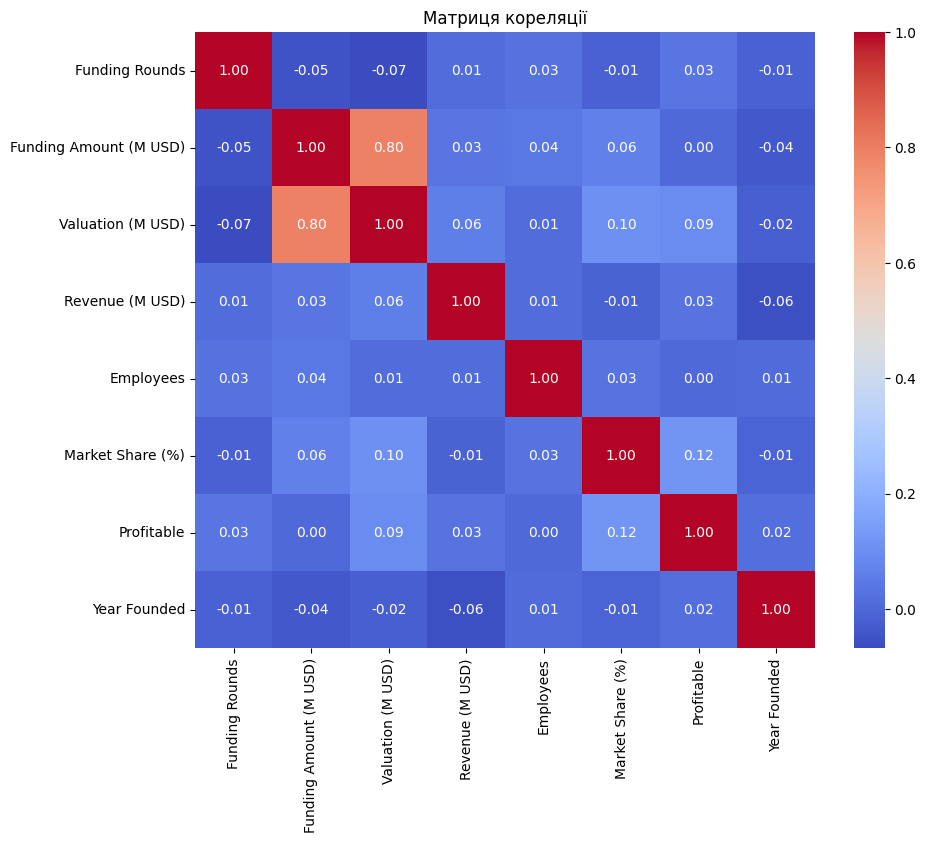

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Завантаження даних
try:
    data = pd.read_csv("startup_data.csv")  # Переконайтеся, що файл існує
except FileNotFoundError:
    print("Помилка: Файл 'startup_data.csv' не знайдено.")
    exit()

# Перегляд перших рядків
print(data.head())

# Попередня обробка даних
# Перевірка наявності пропущених значень
missing_values = data.isnull().sum()
print("Пропущені значення у стовпцях:")
print(missing_values[missing_values > 0])

# Заповнення пропущених значень
for column in data.columns:
    if data[column].dtype == "object":
        data[column].fillna(data[column].mode()[0], inplace=True)  # Заповнюємо модою
    else:
        data[column].fillna(data[column].mean(), inplace=True)  # Заповнюємо середнім

# Переконаємось, що немає пропущених значень
print("Кількість пропущених значень після обробки:", data.isnull().sum().sum())

# Видаляємо нечислові колонки перед аналізом кореляції
numeric_data = data.select_dtypes(include=["number"])

# Базовий аналіз кореляцій
correlation = numeric_data.corr()

# Перевіряємо, чи є 'SalePrice' у колонках
if "SalePrice" in numeric_data.columns:
    print(correlation["SalePrice"].sort_values(ascending=False).head(10))
else:
    print("Попередження: Колонка 'SalePrice' відсутня в числових даних!")

# Візуалізація матриці кореляції
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Матриця кореляції")
plt.show()

Note: you may need to restart the kernel to use updated packages.
Funding Rounds              int64
Funding Amount (M USD)    float64
Revenue (M USD)           float64
Employees                   int64
Market Share (%)          float64
Profitable                  int64
Year Founded                int64
Industry_Cybersecurity       bool
Industry_E-Commerce          bool
Industry_EdTech              bool
Industry_FinTech             bool
Industry_Gaming              bool
Industry_HealthTech          bool
Industry_IoT                 bool
Region_Australia             bool
Region_Europe                bool
Region_North America         bool
Region_South America         bool
Exit Status_IPO              bool
Exit Status_Private          bool
dtype: object
R² (коефіцієнт детермінації): 0.671
MAE (середня абсолютна похибка): 427.60
RMSE (середньоквадратична похибка): 568.41



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


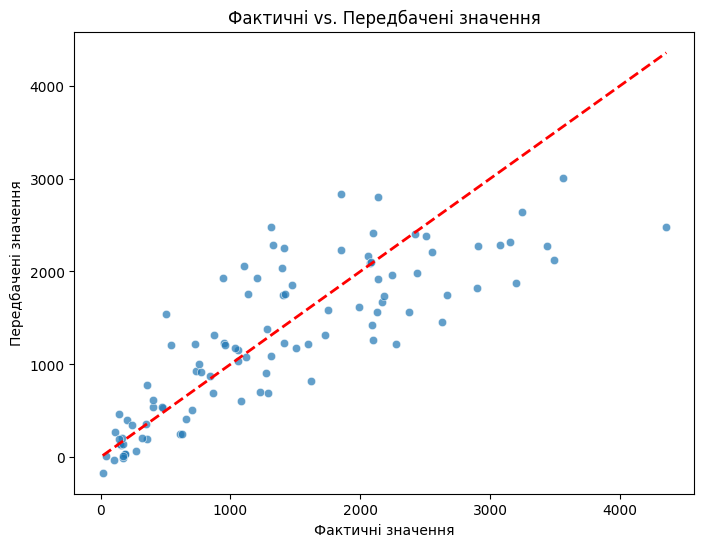

In [26]:
%pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Визначаємо цільову змінну
target_col = "Valuation (M USD)"

# Видаляємо непотрібні текстові змінні
X = data.drop(columns=[target_col, "Startup Name"])  # Видаляємо назву стартапу, бо вона неінформативна
y = data[target_col]

# Закодовуємо категоріальні змінні у числовий формат
X = pd.get_dummies(X, drop_first=True)

# Переконаємось, що X містить лише числові значення
print(X.dtypes)

# ✅ Тепер train_test_split визначений
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створюємо та навчаємо модель лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозуємо значення на тестових даних
y_pred = model.predict(X_test)

# Оцінка точності моделі
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # ✅ Використовуємо np.sqrt()

print(f"R² (коефіцієнт детермінації): {r2:.3f}")
print(f"MAE (середня абсолютна похибка): {mae:.2f}")
print(f"RMSE (середньоквадратична похибка): {rmse:.2f}")

# Візуалізація фактичних vs. передбачених значень
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--r", linewidth=2)  # Лінія ідеального прогнозу
plt.xlabel("Фактичні значення")
plt.ylabel("Передбачені значення")
plt.title("Фактичні vs. Передбачені значення")
plt.show()